# Gather required libraries

In [1]:
import scipy
from scipy.integrate import odeint
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# Test data

In [2]:
time = np.array([0, 1, 3, 10, 30, 60, 100]) # Time points
substrate_concentration = np.array([1, 0.8, 0.7, 0.5, 0.12, 0.02, 0]) # Substrate concentration over time
product1_concentration = np.array([0, 0.20, 0.34, 0.44, 0.52, 0.57, 0.7]) # Concentration of product 1 over time
product2_concentration = np.array([0, 0.08, 0.12, 0.17, 0.21, 0.27, 0.3]) # Concentration of product 2 over time

# Fit decay rate to data based on Decay_program.ipynb

In [3]:
def model_Exp_0(t, k):
    return np.exp(-k * t)

def model_Exp_product(t, k):
    return 1 - np.exp(-k * t)

#initial guess for the rate
Ko = 0.1

# Substrate concentration

In [4]:
#perform the fit

#Intact
params, cv = scipy.optimize.curve_fit(model_Exp_0, time, substrate_concentration, Ko)
sampleRate = 20000 #per second

# determine quality of the fit
squaredDiffs = np.square(substrate_concentration - model_Exp_0(time, params[0]))
squaredDiffsFromMean = np.square(substrate_concentration - np.mean(substrate_concentration))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
tauSec = (1/params[0]) / sampleRate

# inspect the parameters
print(f"""f(t) = e^(-{params[0]} * t)
where k = {params[0]}""") 
print(f"Tau = {tauSec * 1e6} µs")
print("The fit has the following properties: ")
print(f"R² = {rSquared}")

f(t) = e^(-0.08016459208473994 * t)
where k = 0.08016459208473994
Tau = 623.7167644681118 µs
The fit has the following properties: 
R² = 0.9734104852797939


Text(2.5, 0.8, 'R² = 0.973')

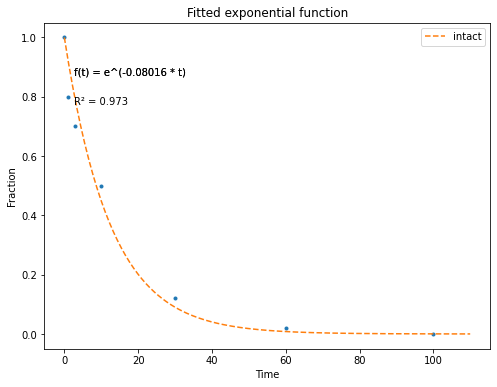

In [5]:
#Intact 
#Generate values for the fitted exponential function
xs1 = np.linspace(min(time), 1.1*max(time), 200)
ys1 = model_Exp_0(xs1, params[0])
text1 = "f(t) = e^(-{:.5f} * t)".format(params[0])
    
#Plot the figure of your data and the fitted function
fig = plt.figure(figsize=(8,6))
plt.plot(time, substrate_concentration, '.')
plt.plot(xs1, ys1, '--', label="intact")
plt.text(2.5, 0.9, text1, verticalalignment='top')


#Add labels
plt.title("Fitted exponential function")
plt.xlabel("Time")
plt.ylabel("Fraction")
plt.legend(loc="upper right")

#Overlay the function and R2 values on the figure
text2 = "R² = {:.3f}".format(rSquared)
plt.text(2.5, 0.9, text1, verticalalignment='top')
plt.text(2.5,0.8,text2, verticalalignment='top')

# Product concentration

In [6]:
#perform the fit

#Intact
params1, cv1 = scipy.optimize.curve_fit(model_Exp_product, time, product1_concentration, Ko)
sampleRate = 20000 #per second

# determine quality of the fit
squaredDiffs = np.square(product1_concentration - model_Exp_product(time, params1[0]))
squaredDiffsFromMean = np.square(product1_concentration - np.mean(product1_concentration))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
tauSec = (1/params1[0]) / sampleRate

# inspect the parameters
print(f"""f(t) = e^(-{params1[0]} * t)
where k = {params1[0]}""") 
print(f"Tau = {tauSec * 1e6} µs")
print("The fit has the following properties: ")
print(f"R² = {rSquared}")

f(t) = e^(-0.019432375384724157 * t)
where k = 0.019432375384724157
Tau = 2573.0256342878765 µs
The fit has the following properties: 
R² = 0.3289846484305896


Text(2.5, 0.8, 'R² = 0.329')

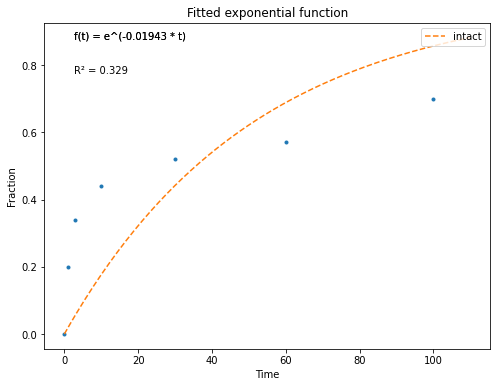

In [7]:
# Product
#Generate values for the fitted exponential function
xs1 = np.linspace(min(time), 1.1*max(time), 200)
ys1 = model_Exp_product(xs1, params1[0])
text1 = "f(t) = e^(-{:.5f} * t)".format(params1[0])
    
#Plot the figure of your data and the fitted function
fig = plt.figure(figsize=(8,6))
plt.plot(time, product1_concentration, '.')
plt.plot(xs1, ys1, '--', label="intact")
plt.text(2.5, 0.9, text1, verticalalignment='top')


#Add labels
plt.title("Fitted exponential function")
plt.xlabel("Time")
plt.ylabel("Fraction")
plt.legend(loc="upper right")

#Overlay the function and R2 values on the figure
text2 = "R² = {:.3f}".format(rSquared)
plt.text(2.5, 0.9, text1, verticalalignment='top')
plt.text(2.5,0.8,text2, verticalalignment='top')

# Fit decay rate to data based on differential equations

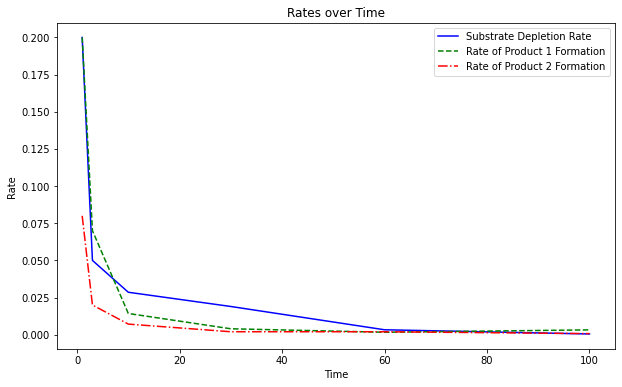

Sum of squared residuals (SSR): 2.19156007319224
Overall rate of substrate depletion: 0.05023412698412699
Overall rate of product 1 formation: 0.04398035714285714
Overall rate of product 2 formation: 0.001864880952380952


In [8]:
# Calculate the rate of product formation and substrate depletion using numerical differentiation
dt = np.diff(time)  # Calculate time intervals

# The sustem of equations:
dsubstrate_dt = -np.diff(substrate_concentration) / dt # Derivative of substrate concentration with respect to time (substrate depletion rate)
dproduct1_dt = np.diff(product1_concentration) / dt  # Derivative of product concentrations with respect to time
dproduct2_dt = np.diff(product2_concentration) / dt  # Derivative of product concentrations with respect to time

# Fraction of the final product 
c1 = 0.9
c2 = 1-c1

# Calculate overall rates with the fraction of the final product
overall_rate_substrate_depletion = np.mean(dsubstrate_dt)
overall_rate_product1_formation = np.mean(dproduct1_dt) * c1
overall_rate_product2_formation = np.mean(dproduct2_dt) * c2

# Model predictions
predicted_substrate_depletion = overall_rate_substrate_depletion * dt[-1]
predicted_product1_formation = overall_rate_product1_formation * dt[-1]
predicted_product2_formation = overall_rate_product2_formation * dt[-1]

# Observed data
observed_substrate_depletion = substrate_concentration[0] - substrate_concentration[-1]
observed_product1_formation = product1_concentration[-1]
observed_product2_formation = product2_concentration[-1]

# Calculate sum of squared residuals (SSR)
ssr = (predicted_substrate_depletion - observed_substrate_depletion)**2 + \
      (predicted_product1_formation - observed_product1_formation)**2 + \
      (predicted_product2_formation - observed_product2_formation)**2

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time[1:], dsubstrate_dt, label='Substrate Depletion Rate', linestyle='-', color='blue')
plt.plot(time[1:], dproduct1_dt, label='Rate of Product 1 Formation', linestyle='--', color='green')
plt.plot(time[1:], dproduct2_dt, label='Rate of Product 2 Formation', linestyle='-.', color='red')

plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Rates over Time')
plt.legend()
plt.show()

print("Sum of squared residuals (SSR):", ssr)
print("Overall rate of substrate depletion:", overall_rate_substrate_depletion)
print("Overall rate of product 1 formation:", overall_rate_product1_formation)
print("Overall rate of product 2 formation:", overall_rate_product2_formation)

In [9]:
# Verification

# Verify the relationship between rates
relationship_verified = np.allclose(-dsubstrate_dt, dproduct1_dt + dproduct2_dt)

# Display the relationship verification
if relationship_verified:
    print("The relationship between substrate depletion rate and product formation rates is verified.")
else:
    print("The relationship between substrate depletion rate and product formation rates is not verified.")

The relationship between substrate depletion rate and product formation rates is not verified.
